In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# insample = pd.read_csv(
#     os.path.join(
#         r'2024_10_07 17-55-55 Deep Neural Network 3oosRMSE',
#         r'2024_10_07 17-55-55 Deep Neural Network 3oosRMSE insample_results.csv'
#     )
# )

# outofsample_results = pd.read_csv(
#     os.path.join(
#         r'2024_10_07 17-55-55 Deep Neural Network 3oosRMSE',
#         r'2024_10_07 17-55-55 Deep Neural Network 3oosRMSE outofsample_results.csv'
#     )
# )


##################
# training start #
##################

Wed Oct  9 08:43:48 2024


pricing settings:
Actual/365 (Fixed) day counter
New York stock exchange calendar
compounding: continuous
frequency: annual


importing dataset(s)...



loading: 100%|███████████████████████████████████████████████████████████████████████| 882/882 [00:17<00:00, 50.96it/s]



preparing data...


         spot_price  strike_price       barrier  days_to_maturity  \
count  4.446559e+06  4.446559e+06  4.446559e+06      4.446559e+06   
mean   1.407845e+03  1.406800e+03  1.407680e+03      3.305861e+02   
min    9.851700e+02  8.866530e+02  4.925850e+02      6.000000e+01   
25%    1.333240e+03  1.315775e+03  1.045324e+03      9.000000e+01   
50%    1.418380e+03  1.406704e+03  1.409008e+03      3.600000e+02   
75%    1.496000e+03  1.501407e+03  1.750725e+03      5.400000e+02   
max    1.565180e+03  1.721698e+03  2.347770e+03      7.200000e+02   
std    1.008005e+02  1.301131e+02  4.475153e+02      2.415886e+02   

       barrier_price     rebate  dividend_rate  risk_free_rate         theta  \
count   4.446559e+06  4446559.0   4.446559e+06    4.446559e+06  4.446559e+06   
mean    5.374085e+01        0.0   2.044764e-02    4.000000e-02  4.955989e-02   
min     2.593117e-08        0.0   1.779800e-02    4.000000e-02  1.992058e-02   
25%     2.380417e+00        0.0   1.8

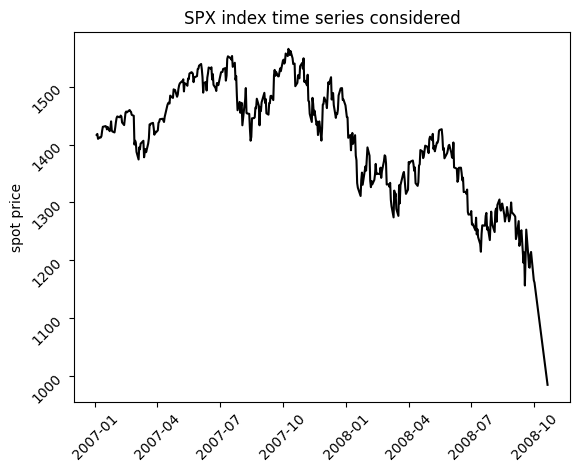

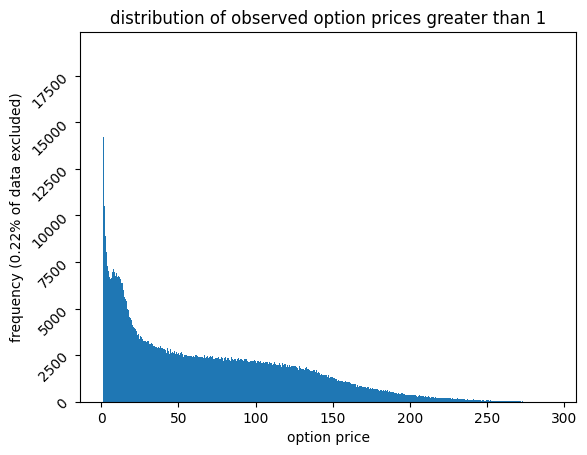

test size: 1.0%
random state: None
maximum iterations: 1000

target: 
observed_price

features: 
['spot_price', 'strike_price', 'days_to_maturity', 'risk_free_rate', 'dividend_rate', 'kappa', 'theta', 'rho', 'eta', 'v0', 'barrier', 'barrier_type_name', 'w']

feature transformer(s):
('StandardScaler', StandardScaler(), ['spot_price', 'strike_price', 'days_to_maturity', 'risk_free_rate', 'dividend_rate', 'kappa', 'theta', 'rho', 'eta', 'v0', 'barrier'])

('OneHotEncoder', OneHotEncoder(sparse_output=False), ['barrier_type_name', 'w'])

target transformer(s):
StandardScaler()

#################
# training data #
#################
         spot_price  strike_price       barrier  days_to_maturity  \
count  3.937983e+06  3.937983e+06  3.937983e+06      3.937983e+06   
mean   1.428923e+03  1.427824e+03  1.428591e+03      3.308515e+02   
min    1.214910e+03  1.093419e+03  6.074550e+02      6.000000e+01   
25%    1.362140e+03  1.344011e+03  1.070848e+03      9.000000e+01   
50%    1.446900e+03 

In [ ]:
from train_main import model_fit, outofsample_results, insample_results

In [ ]:
maturities = outofsample_results['days_to_maturity'].unique().tolist()
barrier_type_names = outofsample_results['barrier_type_name'].unique().tolist()
oos_byt = outofsample_results.groupby(by='days_to_maturity')

RMSE = pd.DataFrame(
    np.zeros((len(maturities),len(barrier_type_names)),dtype=float),
    index = maturities,
    columns = barrier_type_names
)
for t in maturities:
    subset = oos_byt.get_group(t)
    for i in barrier_type_names:
        RMSE.loc[t,i] = np.sqrt(np.average(subset['outofsample_error'][subset['barrier_type_name']==i]**2))
print(f"\nRMSE:\n{RMSE}\n")

MAE = pd.DataFrame(
    np.zeros((len(maturities),len(barrier_type_names)),dtype=float),
    index = maturities,
    columns = barrier_type_names
)
for t in maturities:
    subset = oos_byt.get_group(t)
    for i in barrier_type_names:
        MAE.loc[t,i] = np.average(np.abs(subset['outofsample_error'][subset['barrier_type_name']==i]))
print(f"\nMAE:\n{MAE}\n")

In [ ]:
plt.figure()
plt.plot(MAE.loc[:, 'DownOut'], label='DownOut')
plt.plot(MAE.loc[:, 'DownIn'], label='DownIn')
plt.plot(MAE.loc[:, 'UpOut'], label='UpOut')
plt.plot(MAE.loc[:, 'UpIn'], label='UpIn')
plt.legend()
plt.show()
plt.close()

In [ ]:
oos_byt